# 1_data_exploration

In [1]:
!pip install pandas matplotlib seaborn


In [2]:
import os
import matplotlib.pyplot as plt
print(os.getcwd())

/Users/diba/Git/skincare-recommender-app/notebooks


In [3]:
%matplotlib inline

In [4]:
# retrieve INCI from HuggingFace
#inci_df = pd.read_json("hf://datasets/yavuzyilmaz/cosmetic-ingredients/ingredients.json")

# save data locally
#inci_df.to_csv("../data/raw/inci_df.csv", index=False)


## Load Data

In [5]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.data_loaders import load_all_reviews_from_sephora, load_inci_data

sephora_reviews_df = load_all_reviews_from_sephora()

inci_df = load_inci_data()

/Users/diba/Git/skincare-recommender-app/utils/data_loaders.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/diba/Git/skincare-recommender-app/utils/data_loaders.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/diba/Git/skincare-recommender-app/utils/data_loaders.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# Preview Data

In [6]:
sephora_reviews_df.head()
sephora_reviews_df[sephora_reviews_df['review_text'].notna()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color
8494,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,NaN,Supergoop!,NaN,2.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2023-03-21,This was gifted by Supergoop! in exchange for ...,Nice packaging but easy to overuse,light,brown,combination,NaN
8495,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,NaN,Supergoop!,NaN,2.0,NaN,NaN,NaN,NaN,...,2.0,0.0,2.0,2023-03-07,I didn’t like it; too much product comes out w...,Packaging is not suits le,NaN,brown,combination,NaN
8496,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,NaN,Supergoop!,NaN,5.0,NaN,NaN,NaN,NaN,...,34.0,2.0,32.0,2023-03-01,Y’all….I’m begging for everyone to read instru...,PLS READ THIS LOL,light,green,normal,brown
8497,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,NaN,Supergoop!,NaN,1.0,NaN,NaN,NaN,NaN,...,5.0,5.0,0.0,2023-02-27,I have not figured out how to use this product...,At a loss,tan,brown,combination,black
8498,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,NaN,Supergoop!,NaN,1.0,NaN,NaN,NaN,NaN,...,7.0,7.0,0.0,2023-02-27,I’m at a loss as to how to use this thing!!! C...,NOT for me!!,fair,blue,combination,blonde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102900,P505392,Multi Action Clear Acne Clearing Treatment Lot...,NaN,StriVectin,NaN,5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2023-03-13,Consider salicylic acid your secret weapon for...,NaN,fair,brown,combination,NaN
1102901,P505392,Multi Action Clear Acne Clearing Treatment Lot...,NaN,StriVectin,NaN,5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2023-03-13,I’ve been using this as my only moisturizer fo...,NaN,NaN,blue,combination,blonde
1102902,P505392,Multi Action Clear Acne Clearing Treatment Lot...,NaN,StriVectin,NaN,5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2023-03-13,I got breakouts whenever it’s my time of month...,NaN,light,blue,combination,blonde
1102903,P505392,Multi Action Clear Acne Clearing Treatment Lot...,NaN,StriVectin,NaN,5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2023-03-13,I love this!!! I don’t get actual acne just an...,NaN,fair,hazel,oily,NaN


In [7]:
sephora_reviews_df.describe()
#sephora_reviews_df.shape # (1102905, 42)

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,...,sephora_exclusive,child_count,child_max_price,child_min_price,Unnamed: 0,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count
count,8494.000000,8.494000e+03,1.102627e+06,8216.000000,1.102905e+06,451.000000,270.000000,8494.000000,8494.000000,8494.000000,...,8494.000000,8494.000000,2754.000000,2754.000000,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06
mean,5422.440546,2.917957e+04,4.298378e+00,448.545521,4.902877e+01,91.168537,20.207889,0.070285,0.071698,0.219096,...,0.279374,1.631622,53.792023,39.665802,1.989864e+05,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00
std,1709.595957,6.609212e+04,1.146057e+00,1101.982529,4.016662e+01,79.195631,24.327352,0.255642,0.258002,0.413658,...,0.448718,5.379470,58.765894,38.685720,1.749886e+05,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01
min,1063.000000,0.000000e+00,1.000000e+00,1.000000,3.000000e+00,0.000000,1.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5333.000000,3.758000e+03,4.000000e+00,26.000000,2.500000e+01,45.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,22.000000,19.000000,5.590600e+04,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00
50%,6157.500000,9.880000e+03,5.000000e+00,122.000000,3.900000e+01,67.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,32.000000,28.000000,1.308240e+05,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00
75%,6328.000000,2.684125e+04,5.000000e+00,418.000000,6.200000e+01,108.500000,25.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,59.000000,42.000000,3.285265e+05,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00
max,8020.000000,1.401068e+06,5.000000e+00,21281.000000,1.900000e+03,617.000000,320.000000,1.000000,1.000000,1.000000,...,1.000000,105.000000,570.000000,400.000000,6.021290e+05,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03


In [8]:
sephora_reviews_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'source_file', 'Unnamed: 0',
       'author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_tone',
       'eye_color', 'skin_type', 'hair_color'],
      dtype='object')

## Check Missing Values - Sephora

In [9]:
columns_to_keep = [
    'product_id',
    'product_name',
    'brand_name',
    'ingredients',
    'rating',
    'primary_category',
    'skin_type',
    'review_text',
    'is_recommended',
    'reviews',
    'price_usd',
    'total_pos_feedback_count',
]

sephora_df = sephora_reviews_df[columns_to_keep]

sephora_df.describe #[1102905 rows x 10 columns]

<bound method NDFrame.describe of         product_id                                       product_name  \
0          P473671                            Fragrance Discovery Set   
1          P473668                            La Habana Eau de Parfum   
2          P473662                          Rainbow Bar Eau de Parfum   
3          P473660                               Kasbah Eau de Parfum   
4          P473658                          Purple Haze Eau de Parfum   
...            ...                                                ...   
1102900    P505392  Multi Action Clear Acne Clearing Treatment Lot...   
1102901    P505392  Multi Action Clear Acne Clearing Treatment Lot...   
1102902    P505392  Multi Action Clear Acne Clearing Treatment Lot...   
1102903    P505392  Multi Action Clear Acne Clearing Treatment Lot...   
1102904    P505392  Multi Action Clear Acne Clearing Treatment Lot...   

         brand_name                                        ingredients  \
0             1

In [10]:
# check missing values
sephora_df.isnull().sum().sort_values(ascending=False) 
# ingredients, reviews, primary_category, is_recommended, skin_type, review_text, rating

ingredients                 1095356
reviews                     1094689
primary_category            1094411
is_recommended               176482
skin_type                    120051
review_text                    9938
total_pos_feedback_count       8494
rating                          278
product_id                        0
product_name                      0
brand_name                        0
price_usd                         0
dtype: int64

<Axes: title={'center': 'Missing Values by Column'}>

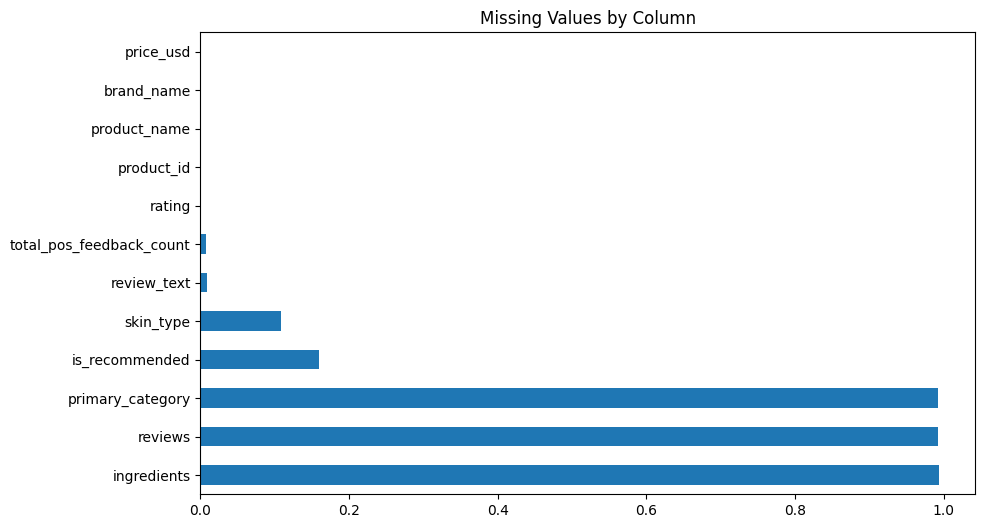

In [11]:
sephora_df.isnull().mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Missing Values by Column')


# Explore Sephora - Skin Types

<Axes: title={'center': 'Skin Type Distribution'}, xlabel='skin_type'>

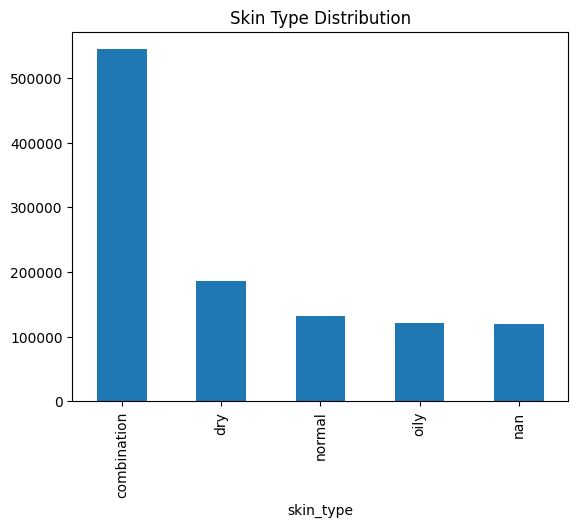

In [12]:
sephora_df['skin_type'].value_counts(dropna=False).plot(kind='bar', title='Skin Type Distribution')
#combination, dry, normal, nan

# Explore Sephora - Product Categories

<Axes: title={'center': 'Top Product Categories'}, ylabel='primary_category'>

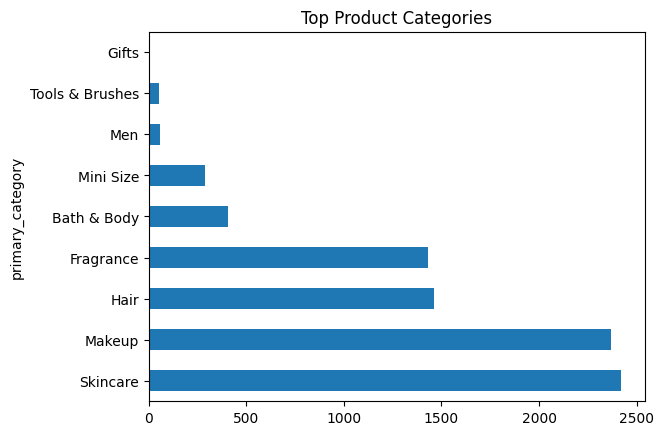

In [13]:
sephora_df['primary_category'].value_counts().head(15).plot(kind='barh', title='Top Product Categories')

# needs to be filtered to only skincare

In [14]:
print(sephora_df['primary_category'].unique())
#['Fragrance' 'Bath & Body' 'Mini Size' 'Hair' 'Makeup' 'Skincare' 'Tools & Brushes' 'Men' 'Gifts' nan]

['Fragrance' 'Bath & Body' 'Mini Size' 'Hair' 'Makeup' 'Skincare'
 'Tools & Brushes' 'Men' 'Gifts' nan]


# Explore Sephora - Ingredients Column

In [15]:
sephora_df['ingredients'].sample(5)

470295     NaN
1064124    NaN
629539     NaN
374643     NaN
632812     NaN
Name: ingredients, dtype: object

In [16]:
sephora_df['ingredients'].isnull().mean()

np.float64(0.9931553488287749)

# Explore INCI Ingredients

In [17]:
inci_df.head()

,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,NaN,Alpha-glucan oligosaccharide is in a class of ...,Prebiotics are a type of non-digestible dietar...,Prebiotics offer benefits such as:\r\n\r\n- He...,"[' ', 'Acne', ' ', 'Blackheads', ' ', 'Redness...","[' ', 'Related Allergy']",https://renude.co/ingredients/alpha-glucan-oli...
1,Aloe Vera,NaN,"Aloe vera, also appear on ingredients lists as...",Aloe vera is a skincare ingredient derived fro...,Aloe vera offers multiple benefits for the ski...,"[' ', 'Dry and dehydrated skin', ' ', 'Impaire...","[' ', 'Related Allergy']",https://renude.co/ingredients/aloe-vera
2,Allantoin,NaN,"Allantoin occurs naturally in the body, but ca...",Allantoin is a skincare ingredient derived fro...,"Allantoin is a calming, anti-inflammatory, and...","[' ', 'Fine Lines', ' ', 'Impaired skin barrie...","[' ', 'Related Allergy']",https://renude.co/ingredients/allantoin
3,Algin,NaN,"Algin, also known as sodium alginate, is a lar...",An extract from brown seaweed used as hydratin...,"In skincare products, it is used for its excel...","[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algin
4,Algae Extract,NaN,"It is essentially an underwater plant, designe...",An incredibly interesting natural ingredient s...,Algae extracts are multifunctional ingredients...,"[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algae-extract


In [18]:
inci_df.shape #(248, 8)

(248, 8)

In [19]:
inci_df.describe()

,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
count,247,1,247,247,247,248,248,248
unique,247,1,245,205,199,84,19,248
top,Alpha-Glucan Oligosaccharide,Euterpe Oleracea Fruit Extract,Arginine is an amino acid that can be found in...,Many peptides function as anti-ageing ingredie...,"Used in skincare to treat fine lines, wrinkles...","[' ', 'Elasticity', ' ', 'Fine Lines', ' ', 'P...","[' ', 'Related Allergy']",https://renude.co/ingredients/alpha-glucan-oli...
freq,1,1,3,19,16,30,203,1


# Check Missing Values - INCI

In [20]:
columns_to_keep = [
    "name",
    "what_does_it_do",
    "who_is_it_good_for",
    "who_should_avoid",
    "short_description",
    "url"
]

inci_df = inci_df[columns_to_keep]

inci_df.shape #(248, 6)

(248, 6)

In [21]:
# check missing values
inci_df.isnull().sum().sort_values(ascending=False) 
# name, what_does_it_do, short_description

name                  1
what_does_it_do       1
short_description     1
who_is_it_good_for    0
who_should_avoid      0
url                   0
dtype: int64

In [22]:
sephora_df.columns

Index(['product_id', 'product_name', 'brand_name', 'ingredients', 'rating',
       'primary_category', 'skin_type', 'review_text', 'is_recommended',
       'reviews', 'price_usd', 'total_pos_feedback_count'],
      dtype='object')

In [23]:
sephora_df[sephora_df["skin_type"].notna()]

,product_id,product_name,brand_name,ingredients,rating,primary_category,skin_type,review_text,is_recommended,reviews,price_usd,total_pos_feedback_count
8494,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,NaN,2.0,NaN,combination,This was gifted by Supergoop! in exchange for ...,0.0,NaN,35.0,0.0
8495,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,NaN,2.0,NaN,combination,I didn’t like it; too much product comes out w...,0.0,NaN,35.0,2.0
8496,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,NaN,5.0,NaN,normal,Y’all….I’m begging for everyone to read instru...,1.0,NaN,35.0,32.0
8497,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,NaN,1.0,NaN,combination,I have not figured out how to use this product...,0.0,NaN,35.0,0.0
8498,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,NaN,1.0,NaN,combination,I’m at a loss as to how to use this thing!!! C...,0.0,NaN,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1102900,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,NaN,5.0,NaN,combination,Consider salicylic acid your secret weapon for...,1.0,NaN,49.0,0.0
1102901,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,NaN,5.0,NaN,combination,I’ve been using this as my only moisturizer fo...,1.0,NaN,49.0,0.0
1102902,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,NaN,5.0,NaN,combination,I got breakouts whenever it’s my time of month...,1.0,NaN,49.0,0.0
1102903,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,NaN,5.0,NaN,oily,I love this!!! I don’t get actual acne just an...,1.0,NaN,49.0,0.0


In [24]:
# save data
inci_df.to_csv("../data/raw/inci_df.csv", index=False)

sephora_df.to_csv("../data/raw/sephora_df.csv", index=False)